In [2]:
# Make sure in shape environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import sklearn.manifold as skm
%matplotlib inline

In [95]:
dists = np.loadtxt('closed_distmat_eval.csv',skiprows=1,delimiter=',')

In [4]:
import ast
f = open('GoodPots/PotIndex.txt','r')
index = f.readlines()
a = []
for x in range(len(index)):
    a.append(ast.literal_eval(index[x]))


In [5]:
# A cheap (fairly crap!) way to make a set of 34 colours
import matplotlib.colors as mcolors
c = list(mcolors.CSS4_COLORS)

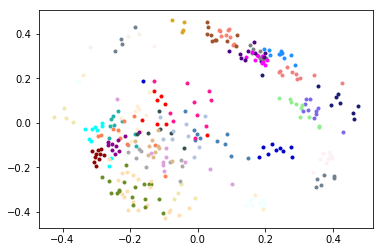

In [6]:
mds = skm.MDS(n_components=2,dissimilarity='precomputed')
newdists = mds.fit_transform(dists)
newdists = np.hstack([newdists,np.ones((325,1))])
for i in range(325):
    pl.plot(newdists[i,0],newdists[i,1],'.',color=c[4*a[i][2]])
    newdists[i,2] = a[i][0]
np.savetxt('AthenianBF_Closed_embedding.csv',newdists)

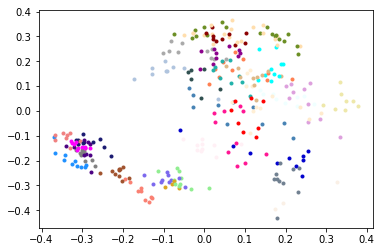

In [7]:
mds = skm.MDS(n_components=3,dissimilarity='precomputed')
newdists = mds.fit_transform(dists)
newdists = np.hstack([newdists,np.ones((325,1))])
for i in range(325):
    pl.plot(newdists[i,0],newdists[i,1],'.',color=c[4*a[i][2]])
    newdists[i,3] = a[i][0]
np.savetxt('AthenianBF_Closed_embedding_3D.csv',newdists)

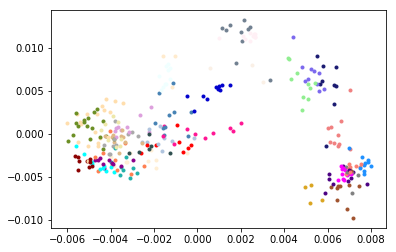

In [96]:
m = np.max(dists)
affinity = m - dists
se = skm.SpectralEmbedding(n_components=2,affinity='precomputed')
newdists = se.fit_transform(affinity)
for i in range(325):
    pl.plot(newdists[i,0],newdists[i,1],'.',color=c[4*a[i][2]])

In [53]:
import scipy.io
mat = scipy.io.loadmat('pots.mat')
dists = mat['dists']
dists = np.triu(dists)
dists = dists+dists.T

In [13]:
#dists = np.loadtxt('h2dists.mat',delimiter=' ')
import scipy.io
mat = scipy.io.loadmat('h2again.mat')

In [25]:
dists = mat['dists']
dists = dists + dists.T

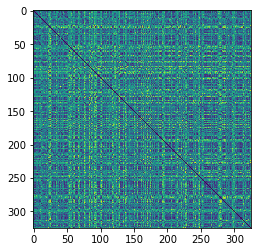

In [31]:
pl.imshow(dists,interpolation='nearest')

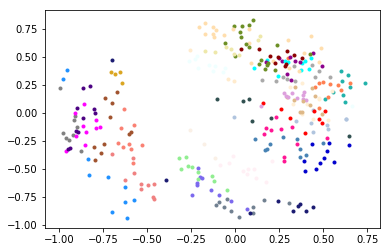

In [35]:
mds = skm.MDS(n_components=2,dissimilarity='precomputed')
newdists = mds.fit_transform(dists)
newdists = np.hstack([newdists,np.ones((325,1))])
for i in range(325):
    pl.plot(newdists[i,0],newdists[i,1],'.',color=c[4*a[i][2]])
    newdists[i,2] = a[i][2]
#np.savetxt('AthenianBF_h2_embedding.csv',newdists)

In [28]:
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

ModuleNotFoundError: No module named 'plotly'

In [60]:
np.fill_diagonal(dists,100)
minargs = np.argmin(dists,axis=0)

In [72]:
count = 0
miss = []
for i in range(len(a)):
    if a[i][2] == a[minargs[i]][2]:
        count +=1
    else:
        miss.append(i)
        if a[i][2] != 25 and a[i][2] != 26:
            print(a[i][2],a[minargs[i]][2])

11 17
23 18
30 10
14 15
5 3
28 4
15 14
28 3
4 6
15 14
4 28
14 12
30 10
14 15
19 4
6 7
15 12
24 11
18 23
14 15
18 23
3 28
20 28
30 29
29 10
4 3
4 3
15 14
19 4
4 3
23 33
18 23
7 6
12 14
14 15
10 30
28 4
30 10
4 28
5 8
23 18
15 14
32 31
4 28
12 14
2 1
30 28


In [81]:
count = 0
miss = []
nneigh=2
for i in range(len(a)):
    minargs = np.argsort(dists[:,i])[:nneigh]
    which = np.bincount(minargs).argmax()
    if a[i][2] == a[which][2]:
        count +=1
    else:
        miss.append(i)
        if a[i][2] != 25 and a[i][2] != 26:
            print(a[i][2],a[which][2])

20 6
2 1
10 29
11 17
23 18
30 10
14 15
12 14
4 28
5 3
15 14
28 3
18 23
4 6
15 12
4 28
15 14
10 30
14 12
12 15
19 5
14 15
19 4
4 28
6 7
24 11
18 23
3 28
20 28
30 29
14 12
8 5
4 3
30 10
15 14
19 4
4 28
23 33
18 23
12 14
10 30
30 29
4 28
5 6
23 18
15 14
32 31
18 23
2 1
10 30
3 28
30 28


In [156]:
#Isomap. The sklearn version won't take pre-computed distance matrices
from scipy.sparse.csgraph import dijkstra

def isomap(dists,nneigh=20):
    # Number of nearest neighbours needs to be large enough to make every point reachable
    loop = True
    while loop:
        d = np.copy(dists)
        for i in range(325):
            inds = np.argsort(dists[i,:])
            d[i,inds[nneigh:]] = 0 #np.infty
        # Has to be symmetric
        for i in range(325):
            for j in range(325):
                if np.isinf(d[i,j]):
                    d[i,j] = d[j,i]
                elif np.isinf(d[j,i]):
                    d[j,i] = d[i,j]

        d2 = dijkstra(d,directed=False)
        if np.shape(np.where(np.isinf(d2)))[1]>0:
            nneigh += 5
        else:
            loop = False
    print(nneigh)
    mds = skm.MDS(n_components=2,dissimilarity='precomputed')
    newdists = mds.fit_transform(d2)
    return newdists

15
20
25


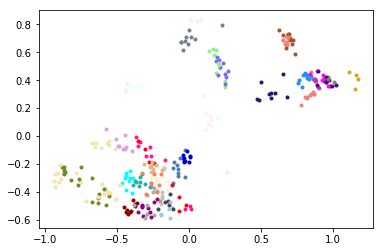

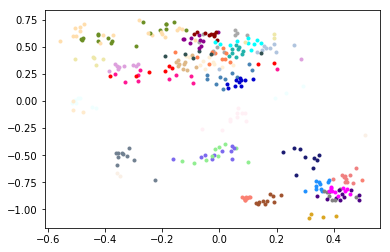

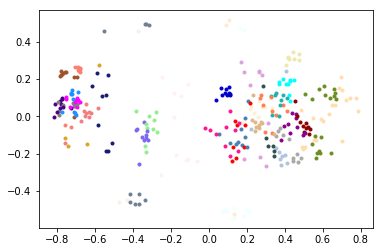

In [159]:
newdists = isomap(dists,10)
for i in range(325):
    pl.plot(newdists[i,0],newdists[i,1],'.',color=c[4*a[i][2]])

pl.figure()
newdists = isomap(dists,20)
for i in range(325):
    pl.plot(newdists[i,0],newdists[i,1],'.',color=c[4*a[i][2]])
    
pl.figure()
newdists = isomap(dists,25)
for i in range(325):
    pl.plot(newdists[i,0],newdists[i,1],'.',color=c[4*a[i][2]])

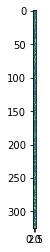

In [109]:
np.isinf(2)

False